# **Handson OpenAI**

In [1]:
!pip install openai

You should consider upgrading via the 'C:\Users\DELL\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


### **Importing OpenAI**

In [1]:
from openai import OpenAI

### **Setting the API Key**

**Step 1**  
Create an OpenAI Account and confirm if you have credits to use the API. If you are running out of credits, you must use a credit card and pay as you go.
<br />
<img width="400" height="400" src="data/images/1_useage_open_ai.JPG">
<br />

**Step 2**  
Create an API KEY.
<br />
<img width="400" height="400" src="data/images/2_api_key.JPG">
<br />

**Step 3**  
Create an OpenAI object by passing the API KEY. 

In [3]:
# Way 1
# Very bad way of setting the key. It exposes the key and anyone can steal it.

OPENAI_API_KEY = "THIS_IS_A_DUMMY_KEY"

client = OpenAI(api_key = OPENAI_API_KEY)

In [4]:
# Way 2
# This is a good way but, there is a much better ways of setting the API key using .env

f = open('keys/.openai_api_key.txt')
OPENAI_API_KEY = f.read()

client = OpenAI(api_key = OPENAI_API_KEY)

In [15]:
# Way 3
# Using python-dotenv

! pip install python-dotenv

You should consider upgrading via the 'C:\Users\DELL\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [4]:
from dotenv import dotenv_values

config = dotenv_values("keys/.env")

client = OpenAI(api_key = config["OPENAI_API_KEY"])

### **1. Completions API (Legacy)**

Used for:
1. Summarization
2. Information Extraction
3. Sentiment Analysis
4. etc...

In [18]:
prompt = "In our solar system, Pluto is a "

response = client.completions.create(
    model="gpt-3.5-turbo-instruct",
    prompt=prompt
)

print(response)

Completion(id='cmpl-8wT9Ajau4IOhRkBoLKhmt5m4adnGP', choices=[CompletionChoice(finish_reason='length', index=0, logprobs=None, text='9th planet. It was classified as a planet when it was first discovered in')], created=1708945756, model='gpt-3.5-turbo-instruct', object='text_completion', system_fingerprint=None, usage=CompletionUsage(completion_tokens=16, prompt_tokens=9, total_tokens=25))


In [19]:
print(response.choices[0].text)

9th planet. It was classified as a planet when it was first discovered in


### **2. Creating Embeddings**

In [16]:
response = client.embeddings.create(
    model = "text-embedding-ada-002",
    input = "This is an example of creating embeddings using OpenAI API.",
)

print(response)

CreateEmbeddingResponse(data=[Embedding(embedding=[-0.02463231235742569, -0.011426080949604511, -0.000664106453768909, -0.004364128224551678, 0.008997349068522453, 0.0029927915893495083, 0.0020147438626736403, 0.0030410902108997107, -0.010066819377243519, -0.04631150886416435, 0.007582888472825289, 0.023762937635183334, 0.005447397939860821, -0.003929440397769213, 0.007072302978485823, 0.022576170042157173, 0.01588335633277893, 0.003180811181664467, 0.02047862857580185, -0.023100554943084717, -0.010501506738364697, -0.005074808374047279, -0.012081563472747803, -0.0024960055015981197, -0.009977121837437153, -0.010101318359375, 0.02463231235742569, -0.02980716899037361, -0.0004301598819438368, -0.02845480665564537, 0.018091294914484024, -0.0034550786949694157, 0.005533645860850811, -0.022024186328053474, -0.011467480100691319, 0.0005683716735802591, 0.01243345346301794, -0.024535715579986572, 0.023321349173784256, -0.0036223989445716143, 0.0007839906611479819, 0.007041253615170717, 0.006

In [17]:
print(len(response.data[0].embedding))

1536


### **3. Chat API**

In [20]:
response = client.chat.completions.create(
      model="gpt-3.5-turbo",
      messages=[
        {"role": "system", "content": "You are a Education Counsellor working with a data science institute."},
        {"role": "user", "content": "Hello!"}
      ]
)

print(response)

ChatCompletion(id='chatcmpl-8wT9Vj6P9PWRS9p78pttOwiItiIFy', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='Hello! How can I assist you today?', role='assistant', function_call=None, tool_calls=None))], created=1708945777, model='gpt-3.5-turbo-0125', object='chat.completion', system_fingerprint='fp_86156a94a0', usage=CompletionUsage(completion_tokens=9, prompt_tokens=27, total_tokens=36))


In [21]:
print(response.choices[0].message)

ChatCompletionMessage(content='Hello! How can I assist you today?', role='assistant', function_call=None, tool_calls=None)


### **4. Image API**

**DALL-E 2**
> Creating images from scratch based on a text prompt.  
> Creating edited versions of images by having the model replace some areas of a pre-existing image, based on a new text prompt. AKA Inpainting.  
> Creating variations of an existing image  
> In Free Tier DALL-E 2 has 5 image per minute rate limit.

**DALL-E 3**
> Creating images from scratch based on a text prompt.  
> In Free Tier DALL-E 3 has 1 image per minute rate limit.

Read about rate-limit of DALL-E 3 **[here](https://platform.openai.com/docs/guides/rate-limits/usage-tiers?context=tier-free)**.

In [7]:
response = client.images.generate(
  model="dall-e-2",
  prompt="astronaut driving a car",
  size="1024x1024",
  quality="standard",
  n=1,
)

image_url = response.data[0].url

print(image_url)

https://oaidalleapiprodscus.blob.core.windows.net/private/org-NgAJPmzBzh0AHfn5prOl9SBt/user-HhAvKwAe71PWe6x8i39Ovss0/img-I7nTBsAiPRbQkKz7BFbpwTEh.png?st=2024-03-01T06%3A40%3A39Z&se=2024-03-01T08%3A40%3A39Z&sp=r&sv=2021-08-06&sr=b&rscd=inline&rsct=image/png&skoid=6aaadede-4fb3-4698-a8f6-684d7786b067&sktid=a48cca56-e6da-484e-a814-9c849652bcb3&skt=2024-03-01T04%3A39%3A09Z&ske=2024-03-02T04%3A39%3A09Z&sks=b&skv=2021-08-06&sig=EEZtt9YtKB8wlHHqxXZaDpF1Y8/7Hgu%2BL6cKC5zvtWI%3D


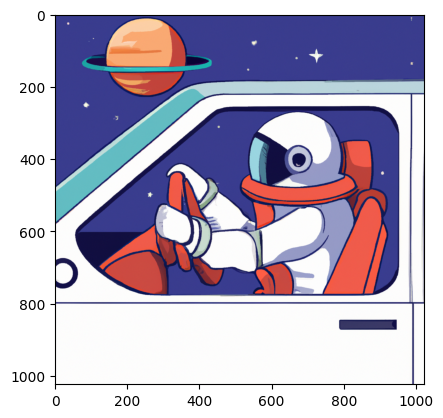

In [13]:
import matplotlib.pyplot as plt
from PIL import Image
import requests

def image_from_url(image_url):
    img = Image.open(requests.get(image_url, stream=True).raw)
    return img

img = image_from_url(image_url)
plt.imshow(img)

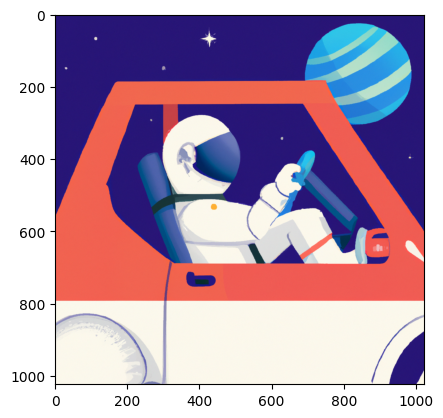

In [17]:
import io

original_img = image_from_url(image_url)

# We should convert images to bytes
img_bytes = io.BytesIO()
original_img.save(img_bytes, format='PNG')
img_bytes = img_bytes.getvalue()

response = client.images.create_variation(
  image=img_bytes,
  n=2,
  size="1024x1024"
)

new_image_url = response.data[0].url

new_img = image_from_url(new_image_url)

plt.imshow(new_img)